# First Dashboard using Dash

Using Dash, we will convert simple data visualizations into interactive dashboards.

In [1]:
import pandas as pd

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

## 1. Getting and exploring the data

In [2]:
# Power Consumption of Tetouan City Data Set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv'
df = pd.read_csv(url)
print(df.shape)
df.head()

(52416, 9)


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
# Renaming some columns
df.rename(columns={'Zone 1 Power Consumption': 'Zone1', 'Zone 2  Power Consumption': 'Zone2', 
                   'Zone 3  Power Consumption': 'Zone3'}, inplace=True)
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone1,Zone2,Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               52416 non-null  object 
 1   Temperature            52416 non-null  float64
 2   Humidity               52416 non-null  float64
 3   Wind Speed             52416 non-null  float64
 4   general diffuse flows  52416 non-null  float64
 5   diffuse flows          52416 non-null  float64
 6   Zone1                  52416 non-null  float64
 7   Zone2                  52416 non-null  float64
 8   Zone3                  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [5]:
# Changing DateTime column to datetime
df.DateTime = pd.to_datetime(df.DateTime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DateTime               52416 non-null  datetime64[ns]
 1   Temperature            52416 non-null  float64       
 2   Humidity               52416 non-null  float64       
 3   Wind Speed             52416 non-null  float64       
 4   general diffuse flows  52416 non-null  float64       
 5   diffuse flows          52416 non-null  float64       
 6   Zone1                  52416 non-null  float64       
 7   Zone2                  52416 non-null  float64       
 8   Zone3                  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [6]:
# Getting one value per day
dfd = df.groupby(pd.Grouper(key='DateTime', freq='1D')).mean().reset_index()
print(dfd.shape)
dfd.head()

(364, 9)


,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone1,Zone2,Zone3
0,2017-01-01,9.675299,68.519306,0.315146,121.390771,25.993924,28465.232067,17737.791287,17868.795181
1,2017-01-02,12.476875,71.456319,0.076563,120.404486,27.227410,28869.493671,19557.725431,17820.763053
2,2017-01-03,12.100000,74.981667,0.076715,120.686014,28.574660,30562.447257,20057.269504,17620.803213
3,2017-01-04,10.509479,75.459792,0.082417,122.959319,28.827222,30689.831224,20102.077001,17673.694779
4,2017-01-05,10.866444,71.040486,0.083896,118.749861,29.741437,30802.911393,20033.941237,17664.176707


In [7]:
# Examining the last 5 rows of the dataframe
dfd.tail()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone1,Zone2,Zone3
359,2017-12-26,11.621840,69.070903,0.083062,106.836687,50.760389,30013.476975,24757.006239,11395.678272
360,2017-12-27,15.232917,59.445903,0.082028,95.890674,41.705062,29966.962399,25057.481845,11498.279312
361,2017-12-28,13.662361,62.839375,0.081354,112.620160,30.209361,30267.004647,24585.251099,11167.026811
362,2017-12-29,12.990486,49.078750,0.078181,122.220021,23.971021,29209.632446,24610.821315,11171.268507
363,2017-12-30,11.688993,51.361667,0.078174,123.814125,24.039944,28145.669624,24211.286693,11560.824329


In [8]:
# Changing the data format for visualizations purposes
dfd_melted = pd.melt(dfd, id_vars=['DateTime'], value_vars=['Zone1', 'Zone2', 'Zone3'])
dfd_melted = dfd_melted.rename(columns={'variable':'Zone', 'value': 'Power'})
dfd_melted.head()

,DateTime,Zone,Power
0,2017-01-01,Zone1,28465.232067
1,2017-01-02,Zone1,28869.493671
2,2017-01-03,Zone1,30562.447257
3,2017-01-04,Zone1,30689.831224
4,2017-01-05,Zone1,30802.911393


In [9]:
# Line chart of Zone 1
zon = dfd_melted['Zone'] == 'Zone1'
px.line(dfd_melted[zon], x='DateTime', y='Power', 
        title='Power Consumption in Zone1, Tetouan, 2017')

In [10]:
# Formatting hover text
zon = dfd_melted['Zone'] == 'Zone1'
px.line(dfd_melted[zon], x='DateTime', y='Power', 
        hover_data={'Power':':.2f'},
        title='Power Consumption in Zone1, Tetouan, 2017')

In [11]:
# Line chart of Zone 2
zon = dfd_melted['Zone'] == 'Zone2'
px.line(dfd_melted[zon], x='DateTime', y='Power', 
        hover_data={'Power':':.2f'},
        title='Power Consumption in Zone2, Tetouan, 2017')

In [12]:
# Line chart of Zone 3
zon = dfd_melted['Zone'] == 'Zone3'
px.line(dfd_melted[zon], x='DateTime', y='Power', 
        hover_data={'Power':':.2f'},
        title='Power Consumption in Zone3, Tetouan, 2017')

## 2. Building the layout

In [13]:
# importing libraries
from dash import Dash, html, dcc, Input, Output

We must import the libraries:

**dash**: the Dash library, which includes:
- **Dash**: class Dash
- **html (Dash HTML Components module)**: for building the layout, which contains components for every HTML tag, such as the H1 heading
- **dcc (Dash Core Components module)**: for building the layout, which contains various higher-level components such as dropdown and graph
- **Input, Output**: for defining callback functions

In [14]:
# Creating the Dash app
app = Dash()

The app-building process always starts by defining the layout. We must begin designing the look of the dashboard.

Notice that the layout has the structure of a tree of components. 

In our dashboard, we will display three components, from top to down:
- **H1 heading** (`html.H1`) is the dashboard's title. 
- A **dropdown menu** based on the Zone. We have built it as a variable outside and then referenced it within the layout:
    - **options**: this property specifies the options of unique zones the dropdown has
    - **value**: this property is the selected zone when we first launch the app. We made it as 'Zone 1'
- A **line graph** (`dcc.Graph`) with id 'line-gr'

In [15]:
# Defining the title
html.H1(id='H1', children='Power Consumption in Tetouan, 2017', 
        style={'textAlign': 'center', 'color': 'black', 'backgroundColor': 'white'})

H1(children='Power Consumption in Tetouan, 2017', id='H1', style={'textAlign': 'center', 'color': 'black', 'backgroundColor': 'white'})

We defined the title as centered, but we could define it as justified to the left or the right.

In [16]:
# Defining the dropdown
dcc.Dropdown(options=dfd_melted['Zone'].unique(),
             value='Zone1', 
             id='zone_drop',
             style={'width': '50%'})

Dropdown(options=array(['Zone1', 'Zone2', 'Zone3'], dtype=object), value='Zone1', style={'width': '50%'}, id='zone_drop')

In [17]:
# Defining the graph with an id
dcc.Graph(id='line-gr')

Graph(id='line-gr')

In [18]:
# Creating the layout
app.layout = html.Div(children=[    
    # Defining the title with style for black text on a white background
    html.H1(id='H1', children='Power Consumption in Tetouan, 2017', 
            style={'textAlign': 'center', 'color': 'black', 'backgroundColor': 'white'}),    
    # Defining the dropdown    
    dcc.Dropdown(
        options=[{'label': zone, 'value': zone} for zone in dfd_melted['Zone'].unique()],
        value='Zone1',
        id='zone_drop',
        style={'width': '50%', 'margin-left': '20px'}  # Adjust the width and add margin-left
    ),           
    # Defining the graph. Notice we use the id 'line-gr'
    dcc.Graph(id='line-gr')
], style={'backgroundColor': 'white'}   # Setting the background color of the entire layout
) 

The `html.Div` is a wrapper component, and we use it whenever we have multiple Dash components in the layout. 

The `Div` component contains arguments like a unique identifier, style (width, height, or color), and children. We put the other Dash components as a list inside its children's property.

Let us add a callback function to make it interactive.

## 3. Adding interactivity with callback functions

The callback functions are Python functions. They get automatically called by Dash whenever their inputs change. As a result, they run and update their outputs.

We initialize a callback using `@app.callback()` followed by a function definition. Within this function, we define what happens when changing the dropdown value.

Below is the code of our callback function. It makes the plotly figure dependent on the dropdown.

In [19]:
@app.callback(
    Output(component_id='line-gr',  component_property='figure'),
    Input(component_id='zone_drop', component_property='value')
)
def update_graph(selected_zone):
    filtered_zone = dfd_melted[dfd_melted['Zone'] == selected_zone]
    line_fig = px.line(filtered_zone, x='DateTime', y='Power', 
                    hover_data={'Power':':.2f'},
                    title=f'Power Consumption in {selected_zone}')
    return line_fig

We can specify the Output and the Input objects of the callback function within the decorator `@app.callback`. They are properties of Dash components.

We use Output to define the components within the layout, which will be updated when the function below the callback returns some object. 
The Output function takes two arguments:
- `component_id` defines the id of the component we want to update.  
- `component_property` defines the component property to be updated, which is the figure property of `dcc.Graph` in our layout.

## 4. Running the dashboard

We need to run all the code as a whole script, adding these two lines of code after the callback function.

In [20]:
# Run app 
if __name__ == '__main__':
    app.run_server(debug=True, port=8086)

The dashboard looks like this.


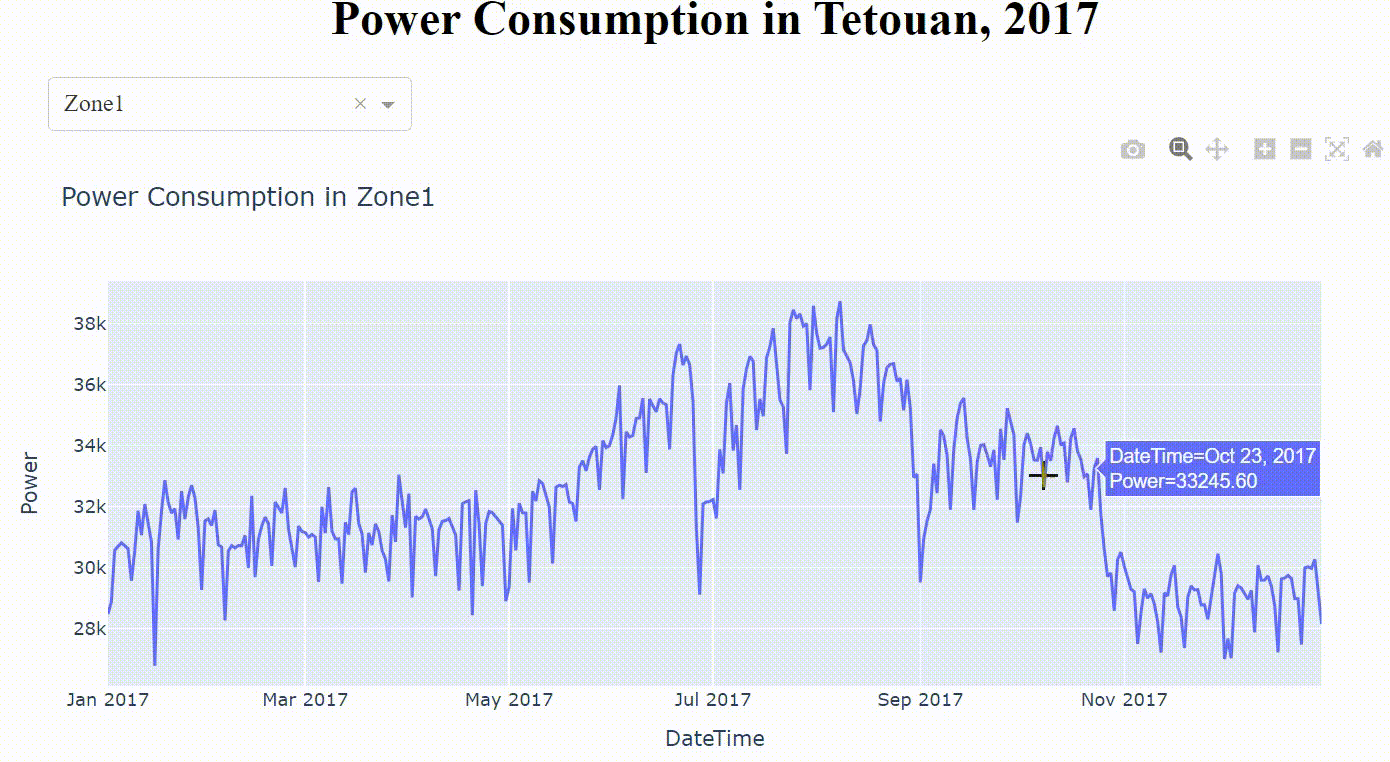

In [1]:
import base64
from IPython.display import HTML

# Open the GIF file, read it in binary mode, and convert to Base64
with open('dropDash.gif', 'rb') as gif_file:
    gif_base64 = base64.b64encode(gif_file.read()).decode('utf-8')

# Embed the Base64 string as a data URL in an HTML img tag
HTML(f'<img src="data:image/gif;base64,{gif_base64}" alt="Embedded Gif" />')

<img src="http://gitbucket.goliathresearch.com/Goliath-Research/Data-Visualization/raw/575360b49684dbb0bff6c043a5d7cefa0b65a76a/Plotly-Dash/dropDash.gif" align="center">

## References

- https://dash.plotly.com/dash-core-components/dropdown
- Salam, A., & El Hibaoui, A. (2018) "Comparison of Machine Learning Algorithms for the Power Consumption Prediction: -Case Study of Tetouan city". In 2018 6th International Renewable and Sustainable Energy Conference (IRSEC) (pp. 1-5)